In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing

In [4]:
data = pd.read_csv("/content/bilkav.com_veriler.csv")

In [ ]:
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [5]:
Y = data["cinsiyet"]
X = data.drop(["cinsiyet", "ulke"], axis=1)

In [6]:
X = X.astype(float)

In [7]:
#Hold out validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [ ]:
#elasticnet

In [13]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = "liblinear",penalty="l2")
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

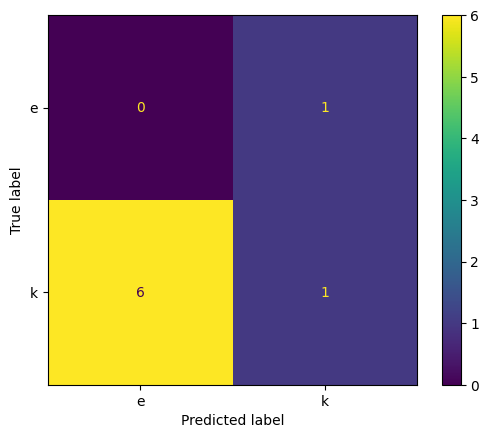

In [14]:
cm = confusion_matrix(y_test, y_pred, labels = log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log_reg.classes_)

disp.plot()
plt.show()

In [15]:
target_names = ['erkek', 'kadın']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       erkek       0.00      0.00      0.00         1
       kadın       0.50      0.14      0.22         7

    accuracy                           0.12         8
   macro avg       0.25      0.07      0.11         8
weighted avg       0.44      0.12      0.19         8



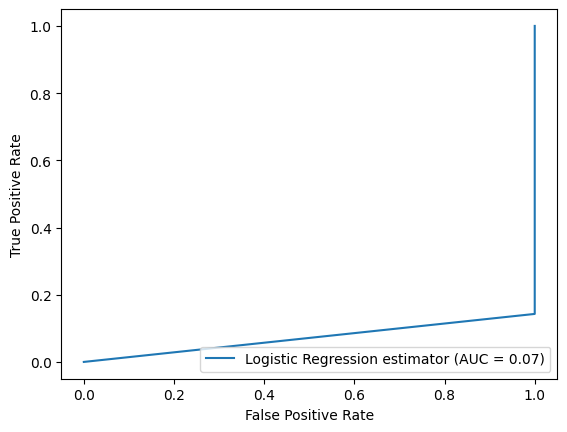

In [ ]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_enc, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Logistic Regression estimator')

display.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, log_reg.predict_proba(X_train)[:, 1])

0.8500000000000001

In [ ]:
#K-fold cross validation.. almost leave one out cross-val
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.33333333 0.66666667 1.         1.         1.         1.
 0.5        1.         0.5        1.        ]
0.80 accuracy with a standard deviation of 0.26


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

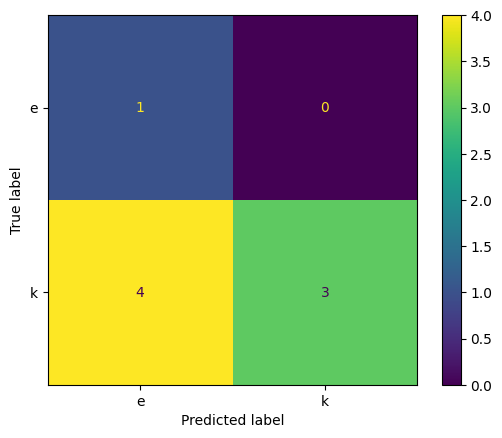

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       erkek       0.20      1.00      0.33         1
       kadın       1.00      0.43      0.60         7

    accuracy                           0.50         8
   macro avg       0.60      0.71      0.47         8
weighted avg       0.90      0.50      0.57         8



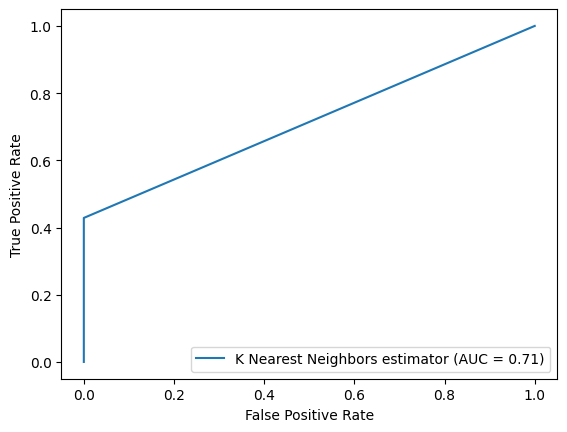

In [ ]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_enc, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='K Nearest Neighbors estimator')

display.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1])

0.875

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.33333333 0.66666667 1.         1.         1.         1.
 0.5        1.         1.         1.        ]
0.85 accuracy with a standard deviation of 0.24


In [16]:
#SVM
from sklearn.svm import SVC
svc = SVC(kernel= "rbf", C= 10, probability = True)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

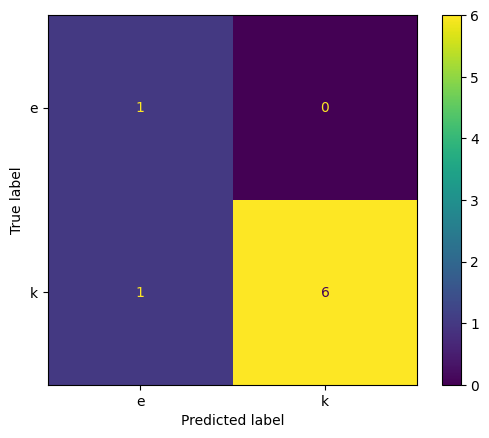

In [17]:
cm = confusion_matrix(y_test, y_pred, labels = svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc.classes_)

disp.plot()
plt.show()

In [18]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       erkek       0.50      1.00      0.67         1
       kadın       1.00      0.86      0.92         7

    accuracy                           0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8



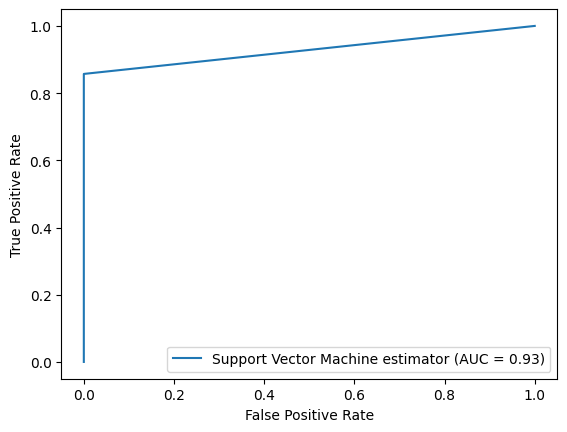

In [20]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_enc, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Support Vector Machine estimator')

display.plot()
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, svc.predict_proba(X_train)[:, 1])

1.0

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.33333333 0.66666667 1.         1.         1.         1.
 0.5        1.         1.         1.        ]
0.85 accuracy with a standard deviation of 0.24


In [ ]:
#4 metrics + AUC

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

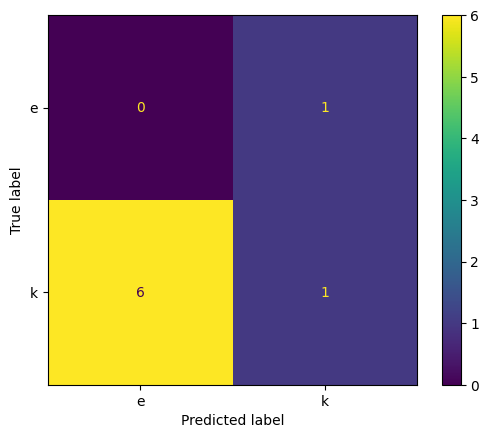

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gnb.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       erkek       0.00      0.00      0.00         1
       kadın       0.50      0.14      0.22         7

    accuracy                           0.12         8
   macro avg       0.25      0.07      0.11         8
weighted avg       0.44      0.12      0.19         8



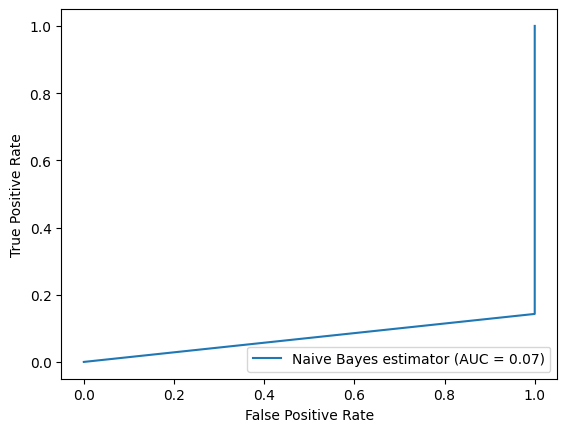

In [ ]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_enc, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Naive Bayes estimator')

display.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, gnb.predict_proba(X_train)[:, 1])

0.875

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.33333333 0.33333333 1.         1.         1.         1.
 0.5        1.         1.         1.        ]
0.82 accuracy with a standard deviation of 0.28


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)

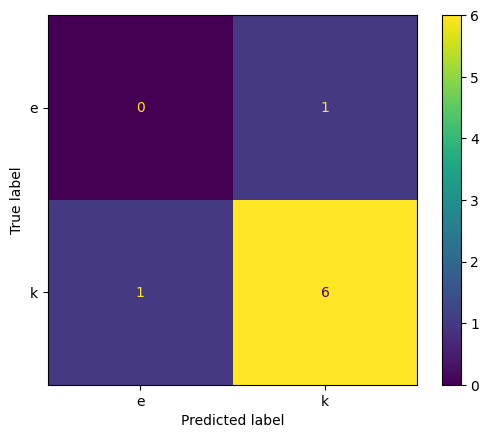

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = bnb.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       erkek       0.00      0.00      0.00         1
       kadın       0.86      0.86      0.86         7

    accuracy                           0.75         8
   macro avg       0.43      0.43      0.43         8
weighted avg       0.75      0.75      0.75         8



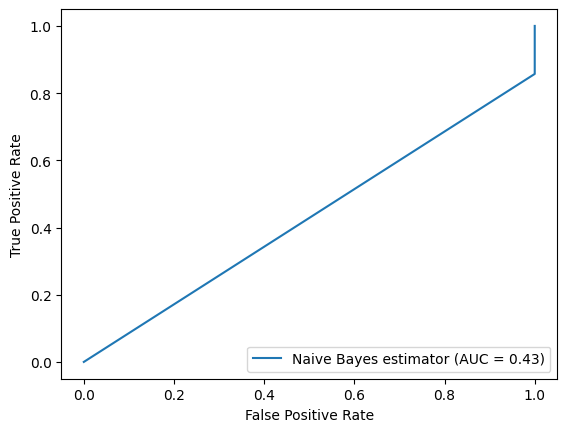

In [ ]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_enc, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Naive Bayes estimator')

display.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, bnb.predict_proba(X_train)[:, 1])

0.85

In [ ]:
scores = cross_val_score(bnb, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.33333333 0.33333333 0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5       ]
0.47 accuracy with a standard deviation of 0.07


Naive Bayes bir Generative Learning Algorithm. Küçük veriseti için ideal.

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

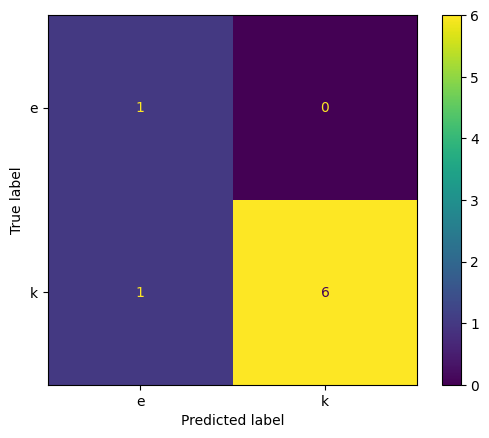

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtc.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       erkek       0.50      1.00      0.67         1
       kadın       1.00      0.86      0.92         7

    accuracy                           0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8



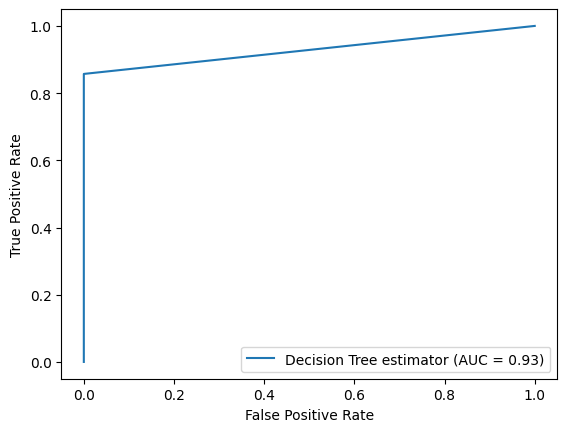

In [ ]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_enc, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Decision Tree estimator')

display.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, dtc.predict_proba(X_train)[:, 1])

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtc, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[1.  1.  1.  1.  1.  1.  0.5 1.  1.  1. ]
0.95 accuracy with a standard deviation of 0.15


In [ ]:
#Random Tree
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

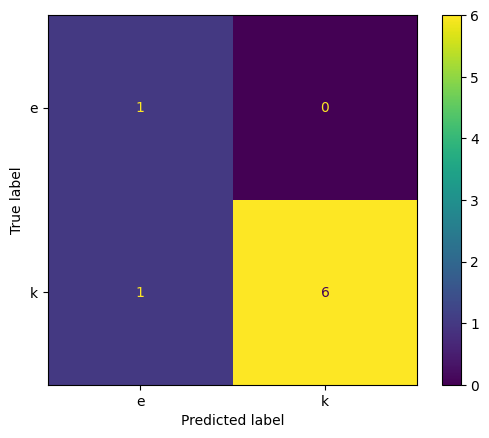

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       erkek       0.50      1.00      0.67         1
       kadın       1.00      0.86      0.92         7

    accuracy                           0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8



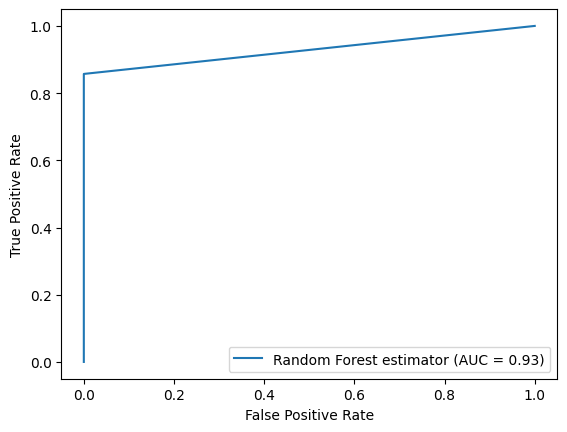

In [ ]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_enc, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Random Forest estimator')

display.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, rfc.predict_proba(X_train)[:, 1])

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.66666667 0.33333333 1.         1.         1.         1.
 0.5        1.         1.         1.        ]
0.85 accuracy with a standard deviation of 0.24


In [ ]:
#try considering GDA : Gaussian Discriminant Analysis (generative learning algo)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

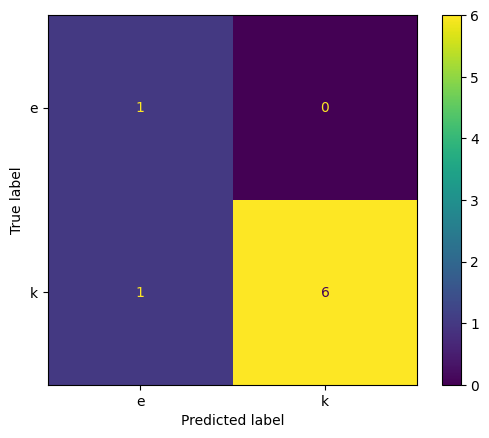

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lda.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       erkek       0.50      1.00      0.67         1
       kadın       1.00      0.86      0.92         7

    accuracy                           0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8



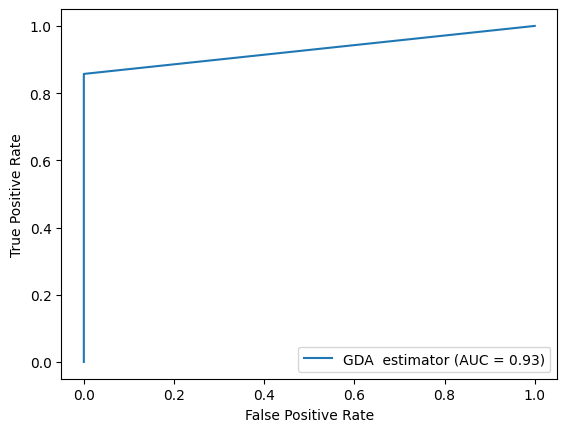

In [ ]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_enc, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='GDA  estimator')

display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lda, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.33333333 1.         1.         1.         1.         1.
 0.5        1.         0.5        1.        ]
0.83 accuracy with a standard deviation of 0.26


In [ ]:
#try regularizing and hunt for the test data that's been predicted incorrect